In [1]:
#Data Exploration and Visulization
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
#Median(50%): the value above/below which 50% data exists out of total sample
#25%: the value below which 25% data exists
#75%: the value below which 75% data exists out of total data
#take GRE Score as an example: 25% student(100 student) got more than 325

Text(0.5, 1.0, 'CGPA vs GRE Score')

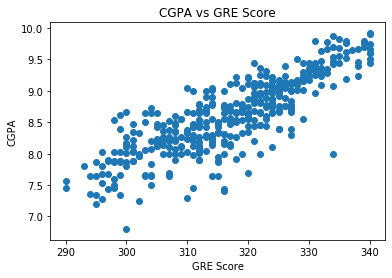

In [6]:
#Scatter Plot between CGPA and GRE Score

import matplotlib.pyplot as plt
plt.scatter(df['GRE Score'],df['CGPA'])
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.title("CGPA vs GRE Score")

In [ ]:
#Scatter plot heplds in finding relationship
#also it helps in finding outliers: outliers are those sample of data
#who does not show similar relationship as other data show.

In [ ]:
#Conclusion: From above graph it is clear that candidates with High 
#GRE Scores usually have high CGPA Score

Text(0.5, 1.0, 'CGPA vs SOP')

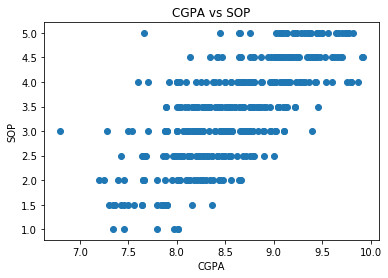

In [7]:
plt.scatter(df['CGPA'],df['SOP'])
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("CGPA vs SOP")

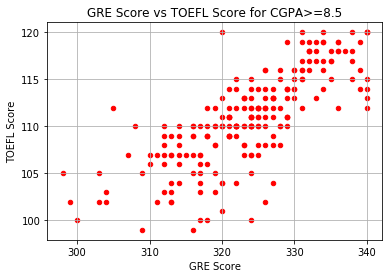

In [11]:
#we are only considering those students who's CGPA is more than 8.5
df[df['CGPA']>=8.5].plot(kind="scatter",x='GRE Score',y='TOEFL Score',color="red")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.title("GRE Score vs TOEFL Score for CGPA>=8.5")
plt.grid(True)
plt.show()

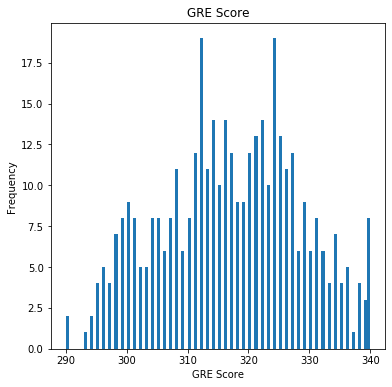

In [13]:
#Histogram: histogram shows the frequency of data (for ex: GRE Score)
#Conclusion: There is a density between 310 and 327
#Being above the range would be a good feature for a candidate to get 
#admitted

df['GRE Score'].plot(kind='hist',bins=100,figsize=(6,6))

plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.title("GRE Score")

plt.show()

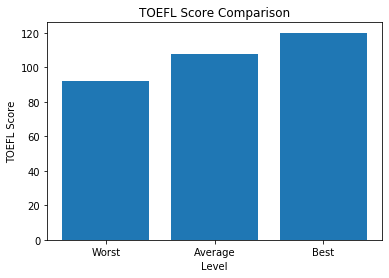

In [14]:
#Bar Chart
import numpy as np
y=np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x=["Worst","Average","Best"]
plt.bar(x,y)

plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.title("TOEFL Score Comparison")

plt.show()

In [15]:
#If Corelation is +1 or -1 , then columns are closed related.
#but if value is close to 0, then there is very little corelation that
#means both columns are laregly indepedent i.e. not related
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


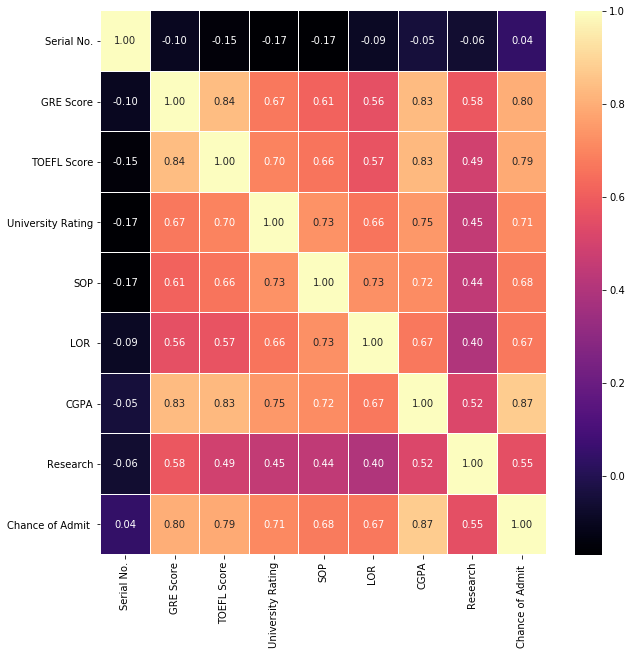

In [17]:
#feature Importance: Which feature is important for outcome?
#It is told by correlation matrix: try to see value of correlation coeficient
#between each column and outcome column and whatever has value closer to 
#+1 or -1, that is definitely a feature for outcome

import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True,linewidth=0.05,fmt='.2f',cmap="magma")
plt.show()


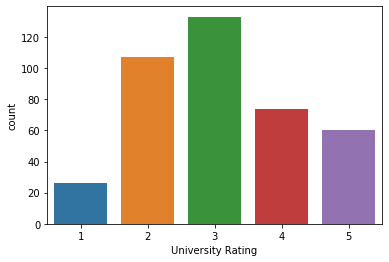

In [18]:
sns.countplot(x="University Rating",data=df)

In [19]:
df["University Rating"].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

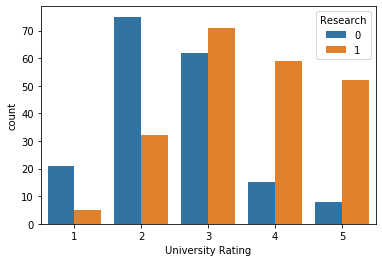

In [20]:
sns.countplot(x="University Rating",hue="Research",data=df)

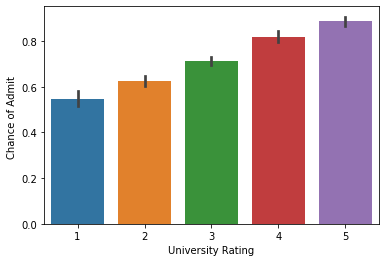

In [23]:
sns.barplot(x="University Rating",y="Chance of Admit ",data=df)

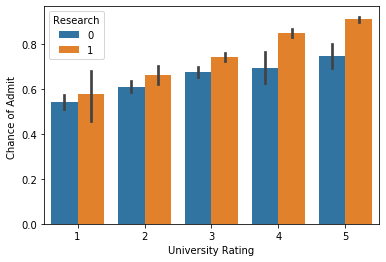

In [24]:
sns.barplot(x="University Rating",y="Chance of Admit ",hue='Research',data=df)

In [ ]:
#Conclusion: Every University gives weigthage to research Experience for 
#Admission